# **Эксперименты**

Как быть уверенным, что жребий выпал правильно? По-видимому, самый простой способ - это бросить жребий много раз, а затем проверить, все ли результаты выпали примерно одинаковое количество раз. Аналогичная логика применима ко многим случайным явлениям в реальной жизни. В этом разделе мы узнаем, как анализировать такие явления, используя большой набор их результатов. А чтобы самим не "бросать кубик" по многу раз, мы будем использовать базовый Python и модуль `random`.

###**Случайные эксперименты**
В теории вероятностей случайный эксперимент - это процедура, имеющая следующие особенности:

1.   Ее можно повторять бесконечное количество раз при одних и тех же условиях.
2.   Результат этой процедуры невозможно предсказать заранее.

Повторения одного и того же эксперимента при одних и тех же условиях называются испытаниями. Итак, когда мы подбрасываем монету четыре раза, мы можем интерпретировать это как один эксперимент "подбросьте монету четыре раза" или как четыре эксперимента "подбросьте монету".

> Случайный эксперимент - это математическая модель. Ни одно явление в реальной жизни не может быть по-настоящему случайным экспериментом просто потому, что ничто не может повторяться бесконечное число раз.

Чем больше раз мы бросим кубик, тем точнее сможем определить, насколько близки доли всех исходов друг к другу. Однако, чтобы доказать, что эти доли в точности равны, нам нужно будет бросать кубик бесконечное количество раз. Вот почему возможность проводить бесконечное количество испытаний имеет решающее значение.

### **Случайные эксперименты в Python**

Существует множество способов проведения случайных экспериментов в Python. В этом разделе мы будем использовать модуль `random`. Например, чтобы получить случайный элемент из заданного списка a, вы можете выполнить следующий код:

In [ ]:
import random

a = ['Head', 'Tail']
random.choice(a)

'Head'

Чтобы провести этот эксперимент `k` раз, нужно выполнить соответствующую функцию `k` раз:

In [ ]:
a = ['Head', 'Tail']
k = 6
[random.choice(a) for i in range(k)]

['Head', 'Tail', 'Head', 'Tail', 'Tail', 'Head']

Также можно использовать метод `random.choices`, который принимает `k` в качестве параметра:

In [ ]:
random.choices(a, k=6)

['Head', 'Tail', 'Tail', 'Tail', 'Tail', 'Head']

Если вы хотите выбрать случайное целое число из `range(a, b, step)`, вы можете использовать `random.randrange(a, b, step)` вместо `random.choice(range(a, b, step))`:

In [ ]:
def dice_roll():
    return random.randrange(1, 7)

[dice_roll() for i in range(5)] # let's roll the dice 5 times

[2, 5, 5, 1, 2]

### **Более сложные эксперименты**

Используя базовые эксперименты, мы можем проводить сложные эксперименты. Например, эксперимент, в котором мы подбрасываем монетку, пока не появится второй орел, можно провести следующим образом:

In [ ]:
def coin_flip():
    return random.choice(['H', 'T'])

def flip_until_second_head():
    total_heads = 0
    outcome = []
    while total_heads < 2:
        outcome.append(coin_flip())
        if outcome[-1] == 'H':
            total_heads += 1
    return outcome

# Let's conduct the experiment 10 times
for i in range(10):
    print(flip_until_second_head())

['T', 'H', 'T', 'H']
['H', 'T', 'T', 'T', 'T', 'T', 'H']
['H', 'H']
['T', 'H', 'H']
['T', 'H', 'T', 'H']
['H', 'T', 'H']
['T', 'H', 'T', 'H']
['H', 'T', 'H']
['T', 'H', 'T', 'T', 'T', 'T', 'T', 'T', 'H']
['T', 'H', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'H']


# **События**

Назовем событиями заявления о результатах эксперимента, истинность которых зависит только от результата. Например, если наш эксперимент состоит в том, чтобы "выбрать случайный арбуз с полки в супермаркете", то утверждения "у арбуза 24 полоски" и "арбуз весит 10 кг" являются событиями, в то время как "арбуз весит 10 кг, и погода хорошая" - нет.

Если для данного исхода событие истинно, то мы можем сказать, что событие произошло. Например, если кубик выпал гранью 6, то произошли события "выпало четное число" и "выпало число, большее трех". Между тем события "выпало нечетное число" и "выпало число меньше четырех" не произошли.

В Python будем представлять события как функции, которые принимают результат в качестве аргумента и возвращают значение `bool`. В приведенном ниже примере мы проводим одну пробную версию эксперимента `flip_until_second_head` из предыдущего раздела. Затем мы проверим, происходят ли события "подбрасывание монеты более четырех раз", "первое подбрасывание монеты привело к выпадению орла" и "две решки были подброшены подряд".

In [ ]:
def more_than_four_flips(outcome):
    return len(outcome) > 4

def first_is_head(outcome):
    return outcome[0] == 'H'

def two_tails_in_a_row(outcome):
    for current, next in zip(outcome, outcome[1:]):
        if current == 'T' and next == 'T':
            return True
    return False

outcome = flip_until_second_head()

print('Outcome:', outcome)
print('Flipped the coin more than four times:', more_than_four_flips(outcome))
print('The first coin flip resulted in heads:', first_is_head(outcome))
print('Two tails were flipped in a row:', two_tails_in_a_row(outcome))

Outcome: ['H', 'T', 'T', 'H']
Flipped the coin more than four times: False
The first coin flip resulted in heads: True
Two tails were flipped in a row: True


In [ ]:
outcome

['H', 'T', 'T', 'H']

In [ ]:
outcome[1:]

['T', 'T', 'H']

In [ ]:
list(zip(outcome, outcome[1:]))

[('H', 'T'), ('T', 'T'), ('T', 'H')]

События описывают в формате "да"/"нет" свойства результата конкретного эксперимента. Однако в реальной жизни нас обычно интересуют результаты явлений, которые еще не произошли. Принимая решение о покупке лотерейного билета, мы не знаем, каков будет результат, но нас интересует, какова вероятность нашего выигрыша: если 1000 человек купят билет, скольким из них повезет? Подобные вопросы приводят нас к мысли, что нам нужно рассматривать события в контексте не одного, а нескольких испытаний. Таким образом, мы приходим к понятию вероятности события.

### **Вероятности**
При наличии последовательности испытаний мы можем оценить, насколько вероятно, что интересующее нас событие произойдет в следующем испытании, просто взглянув на долю испытаний, в которых произошло это событие. Например, давайте оценим вероятность того, что честная монета выпадет орлом как минимум 20 раз за 30 подбрасываний, проведя 1000 испытаний:

In [ ]:
def flip_coin_30_times():
    return random.choices(['H', 'T'], k=30)

def at_least_20_heads(outcome):
    return sum([flip == 'H' for flip in outcome]) >= 20

NUMBER_OF_TRIALS = 1000
occurrences = 0
for i in range(NUMBER_OF_TRIALS):
    if at_least_20_heads(flip_coin_30_times()):
        occurrences += 1

print(occurrences / NUMBER_OF_TRIALS)

0.052


Вероятность составляет примерно 1 к 20. Не очень много! Однако, может ли быть так, что эта доля сильно зависит от результатов наших испытаний? Если это может быть как 1 к 20, так и 15 к 20, то наша оценка не очень полезна. Лучший способ проверить это - повторить всю процедуру несколько раз:

In [ ]:
NUMBER_OF_TRIALS = 1000
for i in range(10):
    occurrences = 0
    for j in range(NUMBER_OF_TRIALS):
        if at_least_20_heads(flip_coin_30_times()):
            occurrences += 1
    print(occurrences / NUMBER_OF_TRIALS, end=' ')

0.045 0.052 0.055 0.053 0.036 0.046 0.043 0.049 0.055 0.049 

Результаты действительно различаются, но все значения довольно близки друг к другу. Давайте попробуем увеличить количество испытаний в сто раз.

In [ ]:
# imagine doing it yourself and not in python
NUMBER_OF_TRIALS = 100000
for i in range(10):
    occurrences = 0
    for j in range(NUMBER_OF_TRIALS):
        if at_least_20_heads(flip_coin_30_times()):
            occurrences += 1
    print(occurrences / NUMBER_OF_TRIALS, end=' ')

0.0495 0.04982 0.05005 0.05035 0.04915 0.04965 0.04892 0.04949 0.0499 0.0486 

Как мы видим, чем больше чисел мы генерируем, тем ближе дроби расположены друг к другу.



> Это фундаментальное свойство случайных экспериментов называется законом больших чисел Бореля. Этот закон гласит, что с увеличением числа испытаний доля испытаний, в которых происходит данное событие $A$, становится одинаковой независимо от результатов испытаний.

Число, к которому сходятся все дроби, называется вероятностью события $A$ и обозначается как $\mathrm{P}(A)$. В нашем случае вероятность события "монета выпадет орлом не менее 20 раз за 30 подбрасываний" близка к 0,05.

### **Подробнее о вероятности**

Поскольку вероятность - это "доля" испытаний, в которых происходит событие, она обязательно находится в диапазоне от 0 до 1. Если вероятность близка к 1, это означает, что событие происходит почти во всех испытаниях, поэтому мы можем ожидать, что оно произойдет и в следующем испытании. И наоборот, если вероятность какого-либо события близка к 0, то мы ожидаем, что оно не произойдет при следующем испытании.

Большое преимущество вероятностей заключается в том, что они позволяют нам оценивать неопределенность событий не только качественно, но и количественно. Если известно, что вероятность выпадения орла равна 0,5, это означает, что если вы подбросите монету несколько раз, примерно половина исходов выпадет орлом. Чем больше подбрасываний мы сделаем, тем меньше вероятность выпадения "орла" будет в два раза меньше.

Закон больших чисел Бореля основан на очень простом способе оценки вероятности любого события, который может быть описан следующим кодом:

In [ ]:
def probability(experiment, event, number_of_trials):
    occurrences = 0
    for i in range(number_of_trials):
        if event(experiment()):
            occurrences += 1
    return occurrences / number_of_trials

Чем больше `number_of_trials`, тем точнее оценка. Этот метод не позволяет точно определить вероятности и часто требует большого количества вычислений или реальных данных. Тем не менее, он применим в тех случаях, когда трудно или невозможно оценить вероятность каким-либо другим способом.

Для проведения собственных экспериментов теперь вы можете использовать методы `choice`, `choices` и `randrange` из модуля `random`. Подробнее в [документации](https://docs.python.org/3/library/random.html).

# **Случайные величины**

Если событие - это функция, которая принимает результат в качестве входных данных и выдает логическое значение, то случайная величина - это функция, которая принимает результат в качестве входных данных и выдает число. Например, в экспериментальной ситуации, когда вы подбрасываете монету до тех пор, пока не выпадет два орла, вы можете подсчитать, сколько раз монета была подброшена и сколько выпало решек:

In [ ]:
import random

def coin_flip():
    return random.choice(['H', 'T'])

def flip_until_second_head():
    total_heads = 0
    outcome = []
    while total_heads < 2:
        outcome.append(coin_flip())
        if outcome[-1] == 'H':
            total_heads += 1
    return outcome

def number_of_flips(outcome):
    return len(outcome)

def number_of_tails(outcome):
    return sum(flip == 'T' for flip in outcome)

outcome = flip_until_second_head()

print('Outcome:', outcome)
print('Number of flips:', number_of_flips(outcome))
print('Number of tails:', number_of_tails(outcome))

Outcome: ['H', 'T', 'H']
Number of flips: 3
Number of tails: 1


Используя случайные величины, определенные для того же эксперимента, вы можете создавать новые случайные величины. Например, чтобы рассчитать количество головок, вы можете просто вычесть число хвостов из числа сальто.

Как и в случае с событиями, полезно изучать случайные величины в контексте не одного, а многих испытаний. Значение случайной величины в одном испытании называется реализацией этой переменной. Давайте сгенерируем 30 реализаций переменной number_of_flips:

In [ ]:
NUMBER_OF_TRIALS = 30

for i in range(NUMBER_OF_TRIALS):
    print(number_of_flips(flip_until_second_head()), end=' ')

2 4 4 3 3 2 4 3 2 3 2 7 5 2 2 5 3 2 3 4 3 5 4 9 4 2 3 2 3 6 

Как вы анализируете такое множество цифр? Для события вы вычисляете долю исходов, при которых оно произошло. Этого было достаточно, поскольку событие может иметь только два "значения": оно произошло или не произошло. Случайная величина может принимать множество различных значений, поэтому представляется разумным вычислять такие доли для каждого значения. Это понимание подводит нас к понятию дискретной случайной величины.

### **Дискретные случайные величины**

Случайная величина называется дискретной, если каждое из ее значений имеет положительную вероятность. Дискретную переменную можно представить в виде таблицы, подобной этой:

Значение    | $x_1$| $x_2$|...
------------|------|------|---
Вероятность | $p_1$| $p_2$|...

Точные значения функции вероятности не могут быть определены на основе конечных данных. Однако мы можем оценить вероятности, подсчитав уникальные значения и их доли. Эта оценка известна как эмпирическая функция вероятности. В Python это обычно делается с помощью функции `numpy.unique(a, return_counts=True)`, где `a` — список реализаций. Эта функция генерирует два массива `numpy`: один содержит уникальные значения, а другой — их количество. Разделив количество значения на их общее количество, мы получим соответствующие оценки. Давайте попробуем оценить вероятности для `number_of_flips`, используя 10 000 попыток:

In [ ]:
import numpy as np

NUMBER_OF_TRIALS = 10000
realizations = []
for i in range(NUMBER_OF_TRIALS):
    realizations.append(number_of_flips(flip_until_second_head()))

unique_values, counts = np.unique(realizations, return_counts=True)
fractions = counts / counts.sum()
for value, fraction in zip(unique_values, fractions):
    print(f'{value}: {fraction}')

2: 0.2579
3: 0.2406
4: 0.1822
5: 0.1252
6: 0.0844
7: 0.0452
8: 0.0272
9: 0.0172
10: 0.0103
11: 0.0046
12: 0.0027
13: 0.0014
14: 0.0008
15: 0.0002
16: 0.0001


При большем количестве испытаний вычисленные доли приближаются к вероятностям, и наша эмпирическая функция вероятности становится более похожей на истинную функцию вероятности.

> Если вероятность значения пренебрежимо мала, оно может никогда не появиться даже в большом количестве испытаний. Это означает, что вы не можете определить, какие значения случайная величина принимает или не принимает из конечного набора испытаний.



### **Визуализация случайных величин**

Эмпирическая функция вероятности предоставляет информацию о исходах в компактной форме. В приведенном выше примере вместо 10000 попыток мы можем сохранить всего 16 пар чисел и использовать их для оценки вероятностей сложных событий, связанных с поведением случайной величины. Для этого нам нужно только выбрать значения случайной величины, при которых происходит событие, а затем просуммировать соответствующие дроби. Например, давайте оценим вероятность того, что `number_of_flips` будет четным:

In [ ]:
def is_even(value):
    return value % 2 == 0

estimate = 0
for value, fraction in zip(unique_values, fractions):
    if is_even(value):
        estimate += fraction

print(estimate)

0.5656000000000001


Гистограмма может помочь лучше понять поведение случайной величины:

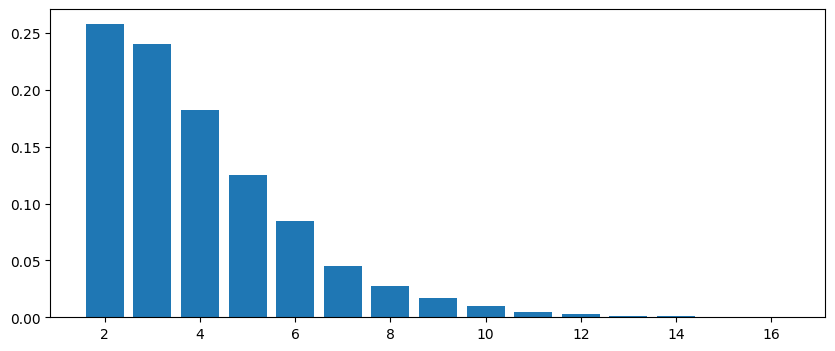

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.bar(unique_values, fractions)
plt.show()

Понятно, что наиболее вероятные значения находятся в диапазоне от 2 до 6, после чего вероятности начинают быстро уменьшаться. Мы почти не видим столбцы в районе 16 из-за их значительно меньших вероятностей!

При всей полезности bar chart, у нее есть некоторые ограничения. Допустим, мы проводим эксперимент. В любой заданный день сайт A посещают `random.randrange(1000, 10001)` пользователей, в то время как сайт B посещают `random.randrange(3000, 12001)` пользователей. Нас интересует разница между количеством пользователей на втором и первом сайте. Давайте проведем 10000 испытаний и построим соответствующую гистограмму:

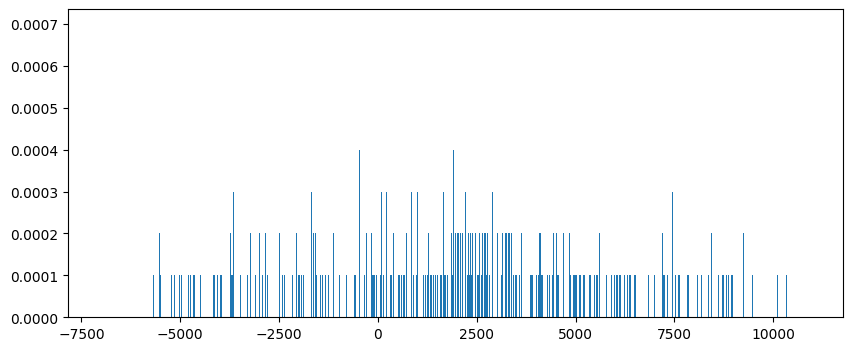

In [ ]:
def visits():
    return random.randrange(1000, 10001), random.randrange(3000, 12001)

def difference(outcome):
    first, second = outcome
    return second - first

NUMBER_OF_TRIALS = 10000
realizations = []
for i in range(NUMBER_OF_TRIALS):
    realizations.append(difference(visits()))

unique_values, counts = np.unique(realizations, return_counts=True)
fractions = counts / counts.sum()

plt.figure(figsize=(10, 4))
plt.bar(unique_values, fractions)
plt.show()

Что-то результат не очень информативный. 😢

> Когда число возможных значений велико, а их вероятности малы, почти все реализации уникальны и происходят только один раз. Вот почему многие столбцы имеют значение `1 / NUMBER_OF_TRIALS`, и bar chart в итоге выглядит загроможденной.

Дальше мы научимся обходить такие неприятные ситуации.

### **Гистограмма**

Для описания мультимножества чисел, в которых все или почти все значения различны, удобно использовать гистограмму. Для этого вам необходимо:

1.   Разделить интервал, содержащий все значения, на несколько интервалов, которые называются bins (ячейка).
2.   Рассчитайте долю значения в каждой ячейке.
3.   Для каждой ячейки нарисуйте столбик, взяв эту ячейку за основу, а высоту, равную доле значений, деленной на ширину ячейки.

Деление в третьем элементе необходимо, чтобы площадь столбца была приблизительно равна вероятности того, что случайная величина примет значение из ячейки. Поскольку общая вероятность равна 1, общая площадь гистограммы также равна 1.

В Python гистограммы можно построить очень быстро, используя метод `plt.hist(realizations, bins=k, density=True)`, где `bins` - это количество ячеек, а значение `density=True` гарантирует, что площадь каждого столбца равна доле реализаций в соответствующей ячейке. Давайте нарисуем гистограмму для 10 000 реализаций `difference`, используя 100 ячеек:

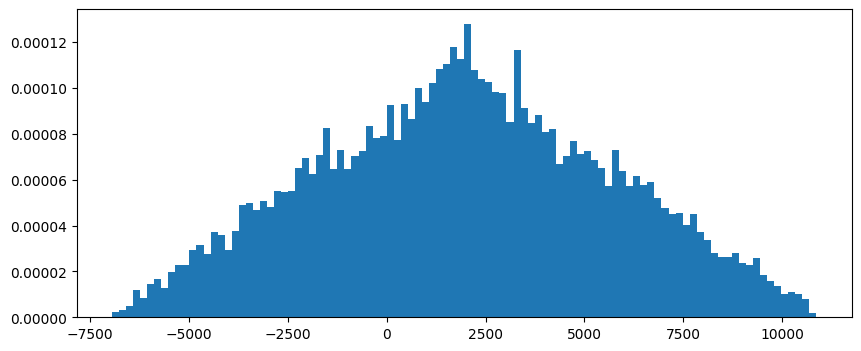

In [ ]:
plt.figure(figsize=(10, 4))
plt.hist(realizations, bins=100, density=True)
plt.show()

Это выглядит намного лучше, чем график из предыдущего раздела! Используя гистограмму, вы можете оценить вероятность того, что случайная величина попадет в определенный интервал. Для этого вам нужно оценить площадь гистограммы, ограниченную этим интервалом. Чем выше гистограмма, тем больше вероятность попадания в интервал. В нашем примере вероятность того, что `difference` попадет в интервал $[7500,10000]$ намного меньше, чем вероятность попадания в интервал $[0,2500]$, несмотря на их одинаковую ширину.

Несколько столбцов гистограммы, приведенной выше, сильно отличаются от соседних. Возможной причиной этого может быть то, что количество реализаций недостаточно велико по сравнению с количеством ячеек. Давайте увеличим количество реализаций до 1 000 000!

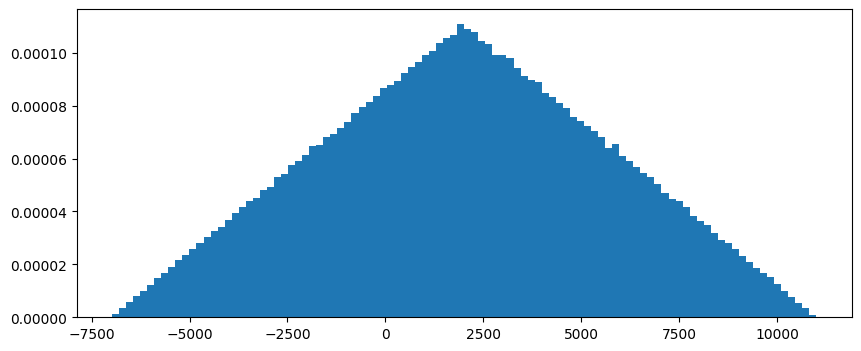

In [ ]:
NUMBER_OF_TRIALS = 1_000_000
realizations = []
for i in range(NUMBER_OF_TRIALS):
    realizations.append(difference(visits()))

plt.figure(figsize=(10, 4))
plt.hist(realizations, bins=100, density=True)
plt.show()

Как мы видим, гистограмма стала более плавной, но она по-прежнему состоит из небольших шагов. Можем ли мы сделать ширину ячеек очень маленькой, а количество попыток - очень большим, чтобы шаги стали неразличимыми? Для случайной величины `difference` мы не можем этого сделать: эта переменная принимает целые значения, поэтому, как только ширина ячеек станет меньше 1, появятся ячейки без реализаций, и мы снова вернемся к плохому графику.

Однако существуют случайные величины, для которых шаги можно сделать неразличимыми, уменьшив ширину ячеек до нуля.

### **Непрерывные случайные величины**

Случайная величина называется непрерывной, если каждое из ее значений принимается с нулевой вероятностью, но внутри сколь угодно малой окрестности этого значения есть значения с положительной вероятностью. Чем меньше окрестность, тем меньше вероятность. Непрерывные случайные величины - это очень интересная математическая модель, но они довольно сложны, поэтому мы не будем давать им формального определения. Как правило, эта модель используется, если даже в очень большом наборе реализаций все или почти все значения различны.

В качестве примера рассмотрим эксперимент, в котором мы генерируем число от 0 до 1 следующим образом: мы генерируем 15 цифр от 0 до 9 и интерпретируем их как десятичные разряды нашего числа:

In [ ]:
def number_from_0_to_1():
    digits = random.choices('0123456789', k=15)
    result = '0.' + ''.join(digits)
    return float(result)

print(number_from_0_to_1())

0.027472206983005


Хотя число возможных значений конечно и вероятность каждого значения положительна, эти вероятности настолько малы, что даже среди 1 000 000 реализаций все значения почти наверняка будут разными:

In [ ]:
realizations = [number_from_0_to_1() for i in range(1_000_000)]

unique_values = np.unique(realizations)
print(len(unique_values))

1000000


Давайте нарисуем гистограмму для наших 1 000 000 реализаций, используя ячейки размера 100:

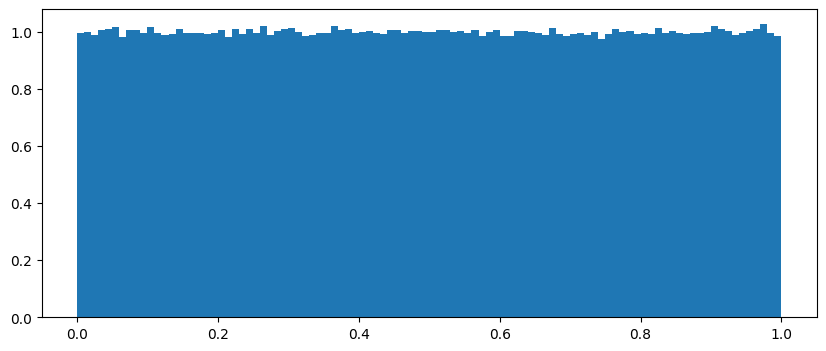

In [ ]:
plt.figure(figsize=(10, 4))
plt.hist(realizations, bins=100, density=True)
plt.show()

Высота гистограммы примерно одинакова от 0 до 1. Это означает, что вероятность попадания в определенный интервал не зависит от того, где он расположен, а только от его ширины.

> Чтобы сделать `number_from_0_to_1` "истинной" непрерывной случайной величиной, нам пришлось бы генерировать бесконечное количество цифр вместо 15. Конечно, вы не можете сгенерировать или сохранить даже одно такое число, поэтому в реальной жизни мы не используем настоящие непрерывные случайные величины. Однако часто удобнее анализировать непрерывные случайные величины, а затем рассматривать числа с плавающей запятой, которые мы фактически используем, как достаточно близкие приближения.

Если вы нарисуете гистограмму для бесконечного числа реализаций непрерывной случайной величины и начнете уменьшать ширину интервалов, то гистограмма будет сходиться к фигуре, ограниченной некоторой кривой. Функция, которую отображает эта кривая, называется плотностью случайной величины. Поскольку площадь гистограммы всегда равна 1, площадь под плотностью также равна 1.

> Как и функция вероятности, плотность однозначно описывает непрерывную случайную величину — вы не можете отличить две случайные величины с одинаковой плотностью, анализируя только их реализации.

Например, если бы мы выполнили эту процедуру для "истинной" случайной величины, полученной из `number_from_0_to_1`, мы бы получили следующую предельную гистограмму:

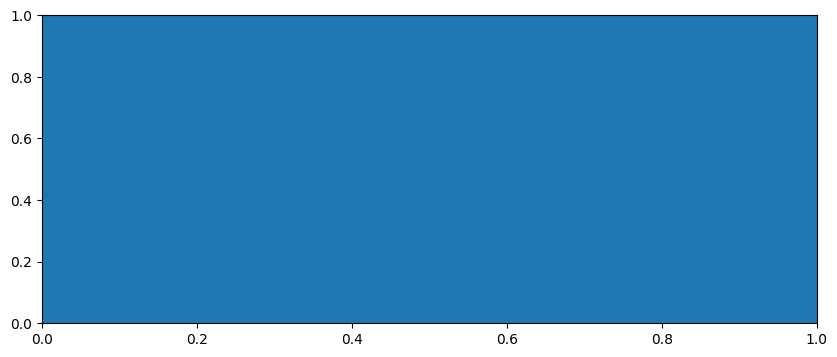

In [ ]:
from matplotlib.patches import Rectangle

fig, ax = plt.subplots(figsize=(10, 4))
ax.add_patch(Rectangle((0, 0), 1, 1))
plt.show()

### **Другой пример: экспоненциальная случайная величина**

Предположим, мы выбрали $n$ случайных точек на отрезке длиной $L$. Мы можем представить это как автомобили, припаркованные вдоль улицы длиной $L$ метров, или как время прибытия $n$ посетителей в течение $L$ минут. Если $n$ достаточно велико, то расстояния между соседними точками отрезка будут случайными величинами, которые распределяются почти как **экспоненциально распределенная** или просто **экспоненциальная** случайная величина с параметром $λ=n/L$. Параметр $λ$ должен быть положительным и может быть интерпретирован как частота: сколько автомобилей припарковано в среднем на одном метре улицы, сколько посетителей приходит в среднем за одну минуту и т.д..

Экспоненциальные случайные величины легко генерируются с помощью метода `random.expovariate(lambd)`:

In [ ]:
print(random.expovariate(0.1))

1.4717191657216533


Плотность экспоненциально распределенной переменной с параметром $λ$, как ни странно, экспоненциальна: она равна $λe^{- λx}$ при положительном $x$ и равна нулю в противном случае.

Давайте убедимся, что расстояние между равномерно распределенными точками действительно выглядит как экспоненциальная случайная величина. Для этого мы сгенерируем 10 000 точек на интервале от 0 до 10 000, построим гистограмму расстояний между соседними точками и сравним ее с плотностью $e^{-x}$ экспоненциальной случайной величины с параметром $λ=1$.

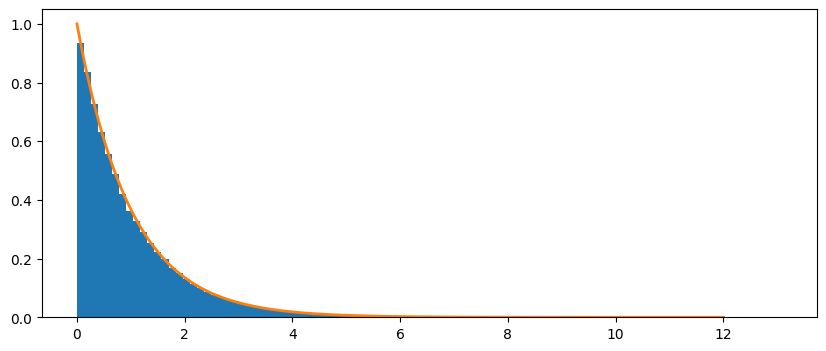

In [ ]:
points = [random.uniform(0, 100000) for i in range(100000)]
points.sort()

lengths = []
for curr, nxt in zip(points, points[1:]):
    lengths.append(nxt - curr)

plt.figure(figsize=(10, 4))
plt.hist(lengths, bins=100, density=True)

x = np.linspace(0, 12, 1000)
plt.plot(x, np.exp(-x), linewidth=2)

plt.show()

# **Математическое ожидание**

Предположим, что мы владеем рестораном, и нас интересует доход, который принесут нам следующие 100 клиентов. Понятно, что мы не можем точно определить это значение, но можем легко его оценить:

1. Посмотрите на прибыль, которую принес нам каждый из предыдущих клиентов.
2. Вычисляем среднюю прибыль: суммируем прибыль предыдущих клиентов и делим на их количество.
3. Оцениваем будущую прибыль от 100 клиентов, умножая рассчитанную среднюю прибыль на 100.

В Python это может выглядеть примерно так:

In [ ]:
past_customers_profits = [10, 35, 12, 14, 54, 32, 45, 11, 41, 7]
average_profit = sum(past_customers_profits) / len(past_customers_profits)
future_customers = 100
print(f'Future profit: ≈{future_customers * average_profit}')

Future profit: ≈2610.0


В качестве альтернативы вы можете использовать метод `numpy.mean` для расчета средней прибыли.

In [ ]:
import numpy

print(numpy.mean(past_customers_profits))

26.1


### **Закон больших чисел**

Средняя прибыль, которую мы рассчитали на шаге 2, зависит от конкретной прибыли, которую принес нам каждый предыдущий клиент: например, если мы владеем не одним рестораном, а сетью из 10 ресторанов, их средняя прибыль будет отличаться, поскольку у них разные клиенты. Давайте посмотрим, как это выглядит в следующем примере. Предположим, что доход от случайного клиента в каждом из 10 ресторанов имеет экспоненциальное распределение с параметром $λ=1$, и давайте посмотрим, какой будет их средний доход, если рестораны рассчитают ее на основе данных о последних 10, 100 или 1000 предыдущих клиентах:

In [ ]:
from random import expovariate

def past_customers_profits(number_of_past_customers):
    return [expovariate(1) for i in range(number_of_past_customers)]

NUMBER_OF_PAST_CUSTOMERS = [10, 100, 1000]
NUMBER_OF_RESTAURANTS = 10

for num in NUMBER_OF_PAST_CUSTOMERS:
    print(f'Number of past customers: {num}')
    for i in range(NUMBER_OF_RESTAURANTS):
        profits = past_customers_profits(num)
        average_profit = sum(profits) / len(profits)
        print(round(average_profit, 4), end=' ')
    print('\n')

Number of past customers: 10
1.343 0.975 1.0364 1.3617 1.6188 0.7481 1.0124 1.2282 1.1037 0.9991 

Number of past customers: 100
1.0098 1.0667 1.1248 0.911 1.1856 1.1208 1.2081 1.0362 0.9515 0.9604 

Number of past customers: 1000
0.9925 0.9941 1.0056 0.9841 1.0188 0.9537 0.9967 0.993 1.0082 0.9968 



Как мы видим, чем больше у нас предыдущих клиентов, тем ближе средний доход друг к другу. Получается, что если мы будем привлекать все больше и больше клиентов, то средний доход будет стремиться к определенному числу. Это число не зависит от конкретного дохода с каждого клиента и называется ожидаемым доходом случайного клиента.

Закон больших чисел выполняется для случайной величины $X$, если для любой бесконечной последовательности ее реализаций $x_1, x_2,...,$ среднее значение первых $k$ чисел $\frac{1}{k}(x_1+...+x_k)$ стремится к конкретному числу при $k$, стремящимся к бесконечности. Это число называется математическим ожиданием $X$ и обозначается за $\mathrm{E}X$.

> Закон больших чисел справедлив для многих случайных величин. Например, он справедлив для экспоненциальных случайных величин и величин, которые принимают значения в пределах некоторого ограниченного интервала $[a,b]$. Однако существуют случайные величины, для которых этот закон не выполняется. Примером такой случайной величины является $1/X$, где $X$ имеет экспоненциальное распределение.

### **Борелевский закон больших чисел**

Это частный случай Закона больших чисел. Чтобы убедиться в этом, давайте зафиксируем некоторое событие $A$ и рассмотрим случайную величину $X_A$, которая равна 1, если $A$ происходит для данного исхода, и 0 в противном случае. В данном случае $\frac{1}{k}(x_1+...+x_k)$ – это доля исходов, в которых $A$ произошло. Поскольку $X_A$ принимает значения в пределах ограниченного интервала, выполняется закон больших чисел, и, таким образом

$$\frac{x_1+...+x_k}{k} \to \mathrm{E}X.$$

Поскольку один и тот же предел равен $\mathrm{P}(A)$, мы получаем, что $\mathrm{P}(A) = \mathrm{E}X_A$.

Математическое ожидание – это удобный способ определения расположения случайной величины при работе с суммами. Однако существуют проблемы, при которых математическое ожидание дает мало информации. Предположим, мы хотим узнать, сколько зарабатывает типичный сотрудник в двух компаниях. В первой компании пусть будет 10 сотрудников с одинаковой зарплатой в \\$50 000 в год, а во второй компании пусть будет 10 сотрудников, один из которых зарабатывает \\$275 000 долларов в год, в то время как остальные 9 зарабатывают \\$25 000 долларов в год. Давайте подсчитаем среднюю заработную плату:

In [ ]:
import numpy as np

first = [50000] * 10
second = [275000] + [25000] * 9

print(np.mean(first), np.mean(second))

50000.0 50000.0


# **Описание данных**

### **Медиана**

Медиана $\mathrm{med}(X)$ случайной величины $X$ – это число, которое делит ее распределение на две части: левую часть, которая имеет вероятность не менее 1/2, и правую часть, которая имеет вероятность не менее 1/2. Другими словами, med(X) – это такое число, что
$$\mathrm{P}(X \leq \mathrm{med}(X)) \geq 1/2,\ \mathrm{P}(X \geq \mathrm{med}(X)) \geq 1/2.$$


Тот факт, что медиана делит распределение случайной величины пополам, дает очень простой способ оценить его, используя набор реализаций этой случайной величины:

1.   Отсортируйте числа в порядке возрастания.
2.   Найдите центральный элемент полученной последовательности, если нечетное число значений, или среднее значение двух центральных элементов, если четное число значений.

### **Медиана в Python**

В Python медиана может быть рассчитана с использованием метода numpy.median. Например, для зарплат, рассмотренных выше, получены следующие значения:

In [ ]:
import numpy as np

first = [50000] * 10
second = [275000] + [25000] * 9

print(np.median(first), np.median(second))

50000.0 25000.0


Как мы видим, медиана правильно отражает тот факт, что типичный сотрудник первой компании зарабатывает в два раза больше, чем его коллега из второй компании.

> Как и в случае с ожидаемым значением, медиана также удовлетворяет аналогу закона больших чисел: чем больше реализаций, тем точнее будет оценка медианы.

Медиана удобна для использования в ситуациях, когда нам нужно понять типичное поведение случайной величины. Однако в жизни часто возникают проблемы, когда нам нужно найти редкие значения случайной величины. Например, предположим, что мы хотим построить пешеходный мост над дорогой и нам нужно определить его высоту. Если мы сделаем мост слишком низким, многие транспортные средства не смогут проехать под ним и им придется объезжать его. С другой стороны, если мы сделаем его слишком высоким, то потратим много денег на строительство. Таким образом, нам нужно найти баланс между количеством транспортных средств, которым придется ехать в объезд, и стоимостью моста. Для решения таких проблем полезно рассмотреть еще один показатель распределения: квантиль.

### **Квантили**

Квантили являются естественным обобщением медианы. Если медиана делит распределение пополам, то $α$-квантиль делит распределение на части с вероятностями $α$ и $1-α$. Более формально число $x_α$, где $α \in (0,1)$, называется $α$-квантилем случайной величины $X$, если
$$\mathrm{P}(X \leq x_α) \geq α,\ \mathrm{P}(X \geq x_α) \geq 1-α.$$

В этих обозначения медиана – это $0.5$-квантиль.

В Python квантиль может быть вычислен с помощью метода `numpy.quantile`. Например, давайте оценим $0.25$-квантиль случайной величины, равномерно распределенной по $[0,1]$:

In [ ]:
import numpy as np
rng = np.random.default_rng()

# generate 100000 realizations of the uniform random variable
sample = rng.uniform(size=100)

np.quantile(sample, 0.25)

0.2572502530921478

Давайте теперь вернемся к задаче о пешеходном мосту из предыдущего раздела. Как квантили могут помочь нам в решении этой задачи? Предположим, мы подсчитали, что можем позволить себе высоту моста, превышающую 99.9% автомобилей, которые будут проезжать под ним. Другими словами, мы можем построить мост, который заставит не более 0.1% автомобилей объезжать его. Затем, чтобы определить минимальную высоту моста, мы можем собрать информацию о высоте автомобилей и найти $0.999$-квантиль.